<a href="https://colab.research.google.com/github/nramelia2/MACHINE-LEARNING/blob/main/WEEK%203_DecisionTreeandkNN/1_Decision_Tree_Classifier_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
# visualization results can be directly printed
%matplotlib inline

In [2]:
from google.colab import drive # connect drive
drive.mount ('/content/drive')

Mounted at /content/drive


### Import Dataset

In [3]:
data = '/content/drive/MyDrive/ML/week3/car_evaluation.csv'
df = pd.read_csv(data, header=None) # read csv

### Exploratory Data Analysis

In [4]:
# view dimensions of dataset
df.shape

(1728, 7)

In [5]:
# preview the dataset - View top 5 rows of dataset
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
# Rename Column Names
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
# let's again preview the dataset
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
# View Summary of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
# Frequency distribution of values in variables
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
    print(df[col].value_counts())  #value_counts() - to get the number of unique values ​​for the column

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [10]:
# Explore class variable
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [11]:
# Missing values in variables
# check missing values in variables
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

### Declare Feature Vector and Target Variable

In [12]:
X = df.drop(['class'], axis=1)

y = df['class']

### Split Data Into Separate Training and Test Set

In [13]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [14]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1157, 6), (571, 6))

### Feature Engineering

In [15]:
# check data types in X_train
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

### Encode Categorical Variables

In [16]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [17]:
pip install --upgrade category_encoders # update if it fail

     |████████████████████████████████| 86 kB 2.4 MB/s 


In [18]:
# import category encoders
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [20]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [21]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


### Decision Tree Classifier with Criterion Gini Index

In [22]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [24]:
# Predict the Test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)

In [25]:
# Check accuracy score with criterion gini index
# Here, y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set.
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8021


In [26]:
# Compare the train-set and test-set accuracy
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [27]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7865


In [28]:
# Check for overfitting and underfitting
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7865
Test set score: 0.8021


###### Here, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.

[Text(0.4, 0.875, 'X[5] <= 1.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.6, 0.625, 'X[3] <= 2.5\ngini = 0.577\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.4, 0.375, 'X[0] <= 2.5\ngini = 0.631\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(0.2, 0.125, 'gini = 0.496\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.6, 0.125, 'gini = 0.654\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

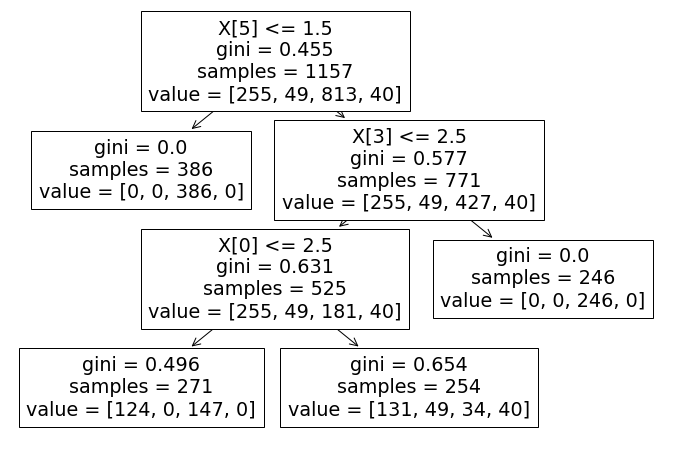

In [29]:
# Visualize decision-trees
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

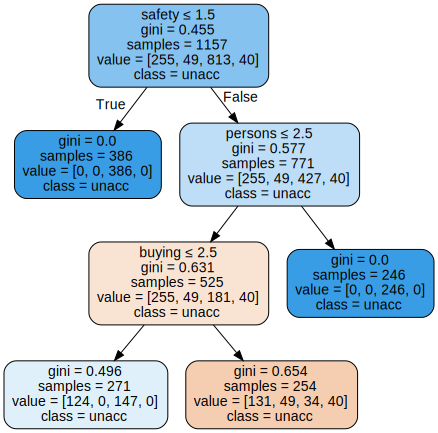

In [30]:
# Visualize decision-trees with graphviz
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True) # filled - color in box, rounded - box arch
graph = graphviz.Source(dot_data) 
graph 

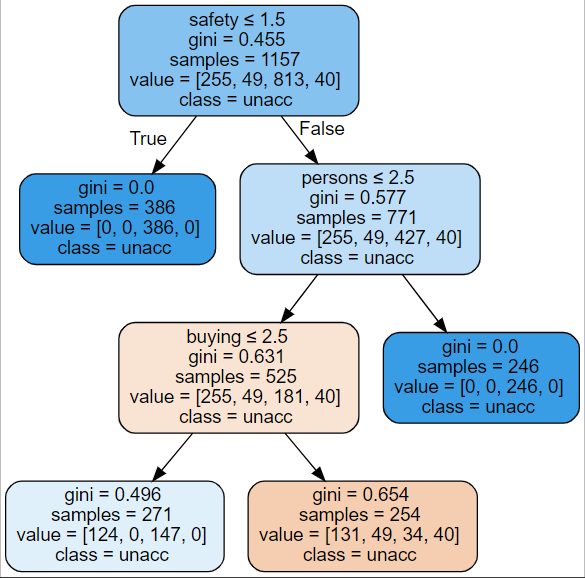

### Decision Tree Classifier with criterion entropy

In [31]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [32]:
# Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(X_test)

In [33]:
# Check accuracy score with criterion entropy
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8021


In [34]:
# Compare the train-set and test-set accuracy
# Now, I will compare the train-set and test-set accuracy to check for overfitting.
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [35]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7865


In [36]:
# Check for overfitting and underfitting
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7865
Test set score: 0.8021


###### We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.

[Text(0.4, 0.875, 'X[5] <= 1.5\nentropy = 1.2\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.6, 0.625, 'X[3] <= 2.5\nentropy = 1.474\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.4, 0.375, 'X[0] <= 2.5\nentropy = 1.638\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(0.2, 0.125, 'entropy = 0.995\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.6, 0.125, 'entropy = 1.759\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

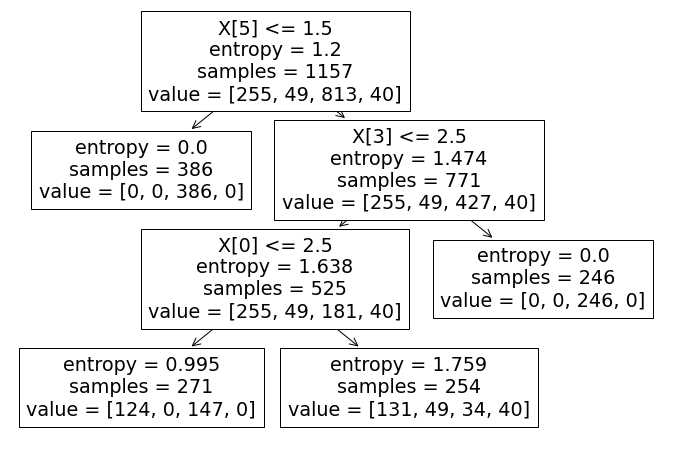

In [37]:
# Visualize decision-trees
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

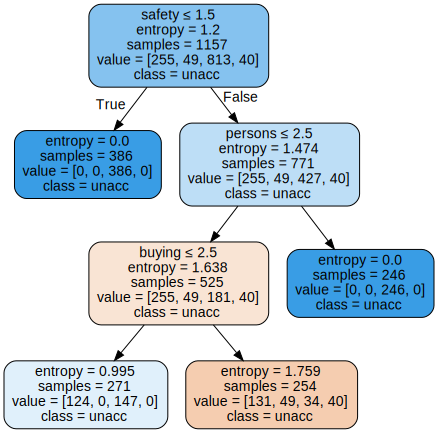

In [38]:
# Visualize decision-trees with graphviz
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)
graph = graphviz.Source(dot_data) 
graph 

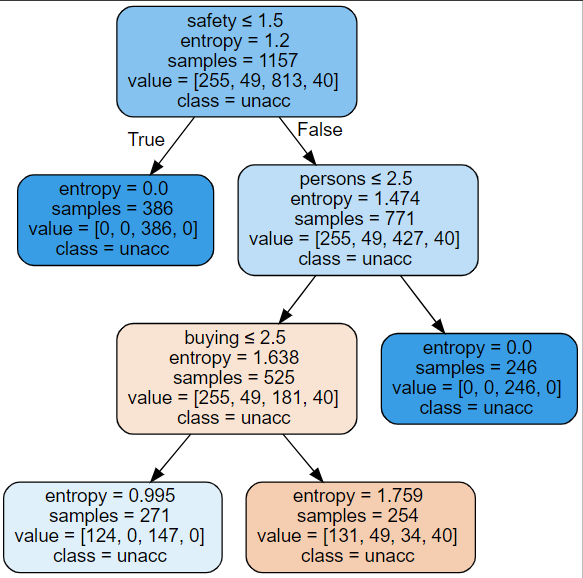

### Confusion matrix

In [39]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 73   0  56   0]
 [ 20   0   0   0]
 [ 12   0 385   0]
 [ 25   0   0   0]]


### Classification Report

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.56      0.57      0.56       129
        good       0.00      0.00      0.00        20
       unacc       0.87      0.97      0.92       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Results and conclusion
###### 1. In this project, I build a Decision-Tree Classifier model to predict the safety of the car. I build two models, one with criterion gini index and another one with criterion entropy. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.8021.
###### 2. In the model with criterion gini index, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.
###### 3. Similarly, in the model with criterion entropy, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021.We get the same values as in the case with criterion gini. So, there is no sign of overfitting.
###### 4.In both the cases, the training-set and test-set accuracy score is the same. It may happen because of small dataset.
###### 5.The confusion matrix and classification report yields very good model performance.

### Reference https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial